In [1]:
import os
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_train = pd.read_csv('Titanic_train.csv')
titanic_test = pd.read_csv('Titanic_test.csv')

In [3]:
# check duplicates data

In [4]:
titanic_train.duplicated().sum()

0

In [5]:
titanic_test.duplicated().sum()

0

In [6]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [8]:
print(titanic_train.shape, titanic_test.shape)

(891, 12) (418, 11)


In [9]:
titanic_train['data'] = 'train'
titanic_test['data'] = 'test'

In [10]:
print(titanic_train.shape, titanic_test.shape)

(891, 13) (418, 12)


In [11]:
all_data = pd.concat([titanic_train, titanic_test], axis=0)

In [12]:
all_data.shape

(1309, 13)

In [13]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [14]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [15]:
# Data Pre-processing part
# part 1 - missing value
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [16]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [17]:
# Drop required from the dataset - Cabin, PassengerId,Name, Ticket, Fare

all_data = all_data.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)

In [18]:
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,male,22.0,1,0,S,train
1,1.0,1,female,38.0,1,0,C,train
2,1.0,3,female,26.0,0,0,S,train
3,1.0,1,female,35.0,1,0,S,train
4,0.0,3,male,35.0,0,0,S,train


In [19]:
all_data.isnull().any()

Survived     True
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Embarked     True
data        False
dtype: bool

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [21]:
all_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027
std,0.486592,0.837836,14.413493,1.041658,0.865560
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000


<AxesSubplot:ylabel='Age'>

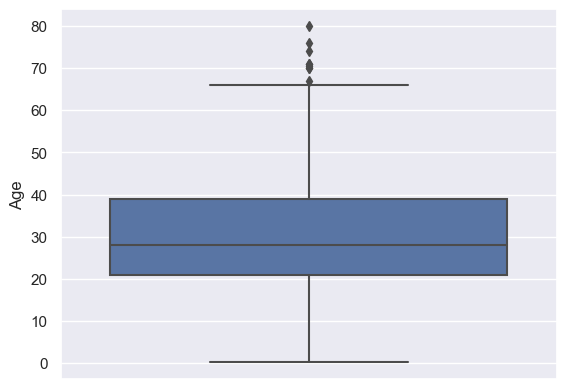

In [22]:
sns.boxplot(y='Age', data=all_data)

In [23]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [24]:
# Embarked
all_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [25]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [26]:
all_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked      0
data          0
dtype: int64

In [27]:
# check all unique values
for i in all_data.columns:
    print("*******************************************",i,
         "***************************************************")
    print()
    print(set(all_data[i].tolist()))
    print()

******************************************* Survived ***************************************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [28]:
# Pre-processing part 2 - Encoding 
# Pclass, Sex, Embarked
print(all_data['Pclass'].value_counts())
print()
print(all_data['Sex'].value_counts())
print()
print(all_data['Embarked'].value_counts())

3    709
1    323
2    277
Name: Pclass, dtype: int64

male      843
female    466
Name: Sex, dtype: int64

S    916
C    270
Q    123
Name: Embarked, dtype: int64


In [29]:
# Label encoder
all_data['Sex'] = all_data['Sex'].astype('category')
all_data['Sex'] = all_data['Sex'].cat.codes
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,1,22.0,1,0,S,train
1,1.0,1,0,38.0,1,0,C,train
2,1.0,3,0,26.0,0,0,S,train
3,1.0,1,0,35.0,1,0,S,train
4,0.0,3,1,35.0,0,0,S,train


In [30]:
# One Hot Encoder
all_data = pd.get_dummies(all_data, columns=['Pclass', 'Embarked'])

In [31]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,train,0,0,1,0,0,1
1,1.0,0,38.0,1,0,train,1,0,0,1,0,0
2,1.0,0,26.0,0,0,train,0,0,1,0,0,1
3,1.0,0,35.0,1,0,train,1,0,0,0,0,1
4,0.0,1,35.0,0,0,train,0,0,1,0,0,1


In [32]:
# dummy variable (n-1)
all_data = all_data.drop(['Pclass_1','Embarked_C'], axis=1)

In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Sex         1309 non-null   int8   
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   data        1309 non-null   object 
 6   Pclass_2    1309 non-null   uint8  
 7   Pclass_3    1309 non-null   uint8  
 8   Embarked_Q  1309 non-null   uint8  
 9   Embarked_S  1309 non-null   uint8  
dtypes: float64(2), int64(2), int8(1), object(1), uint8(4)
memory usage: 67.8+ KB


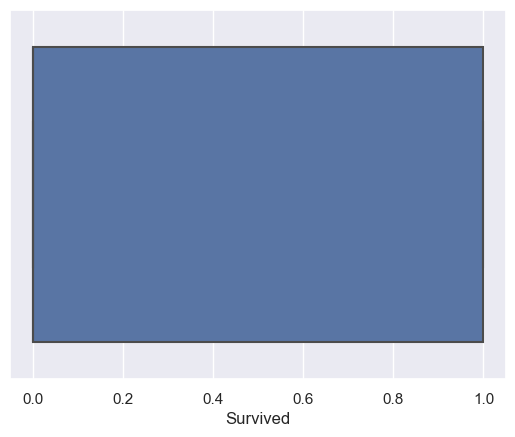

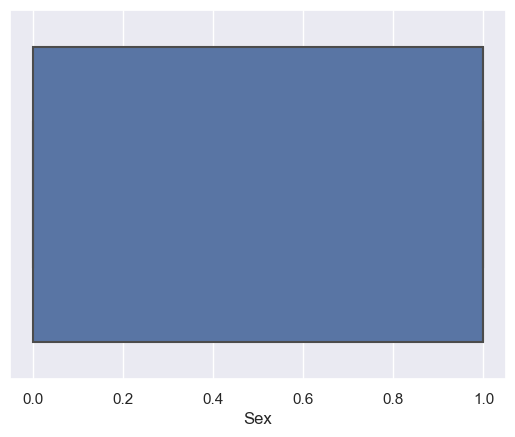

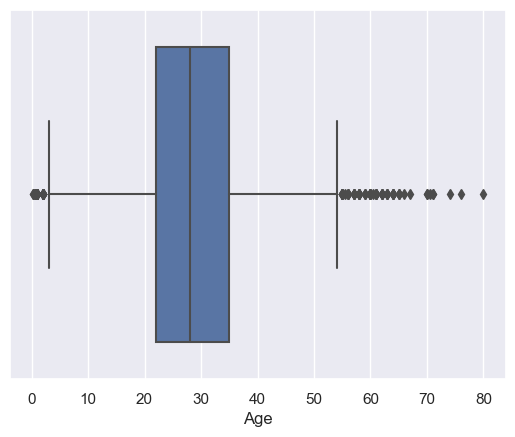

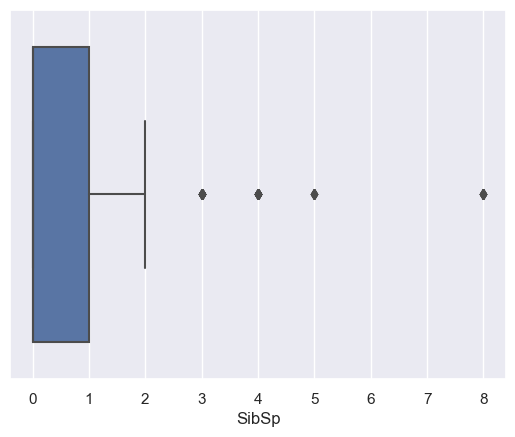

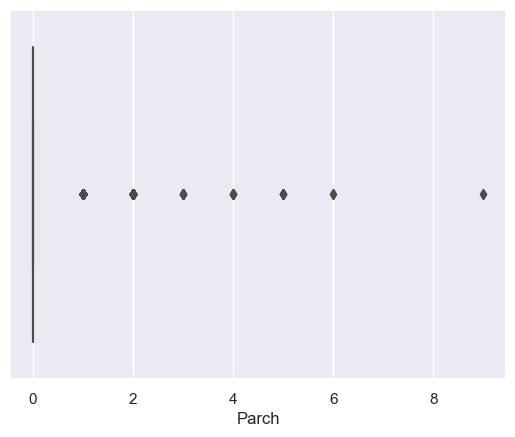

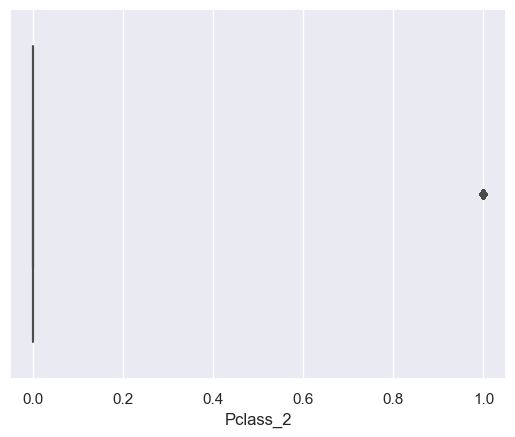

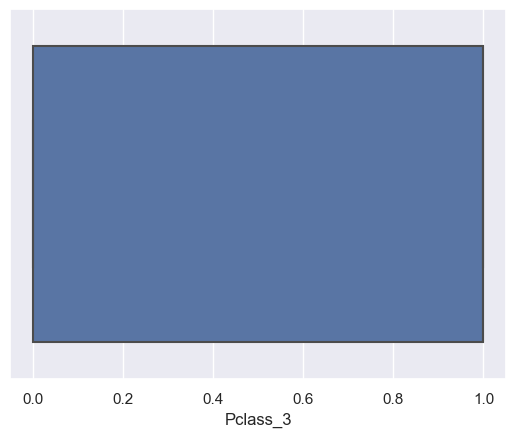

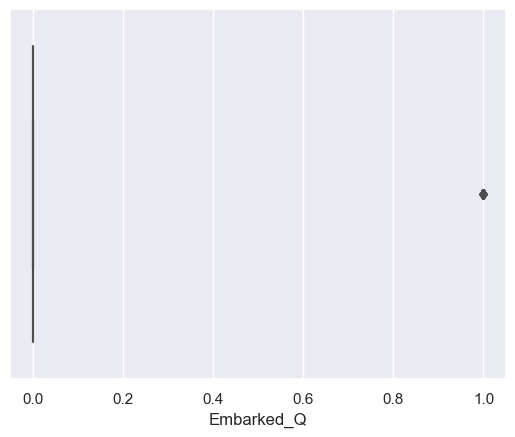

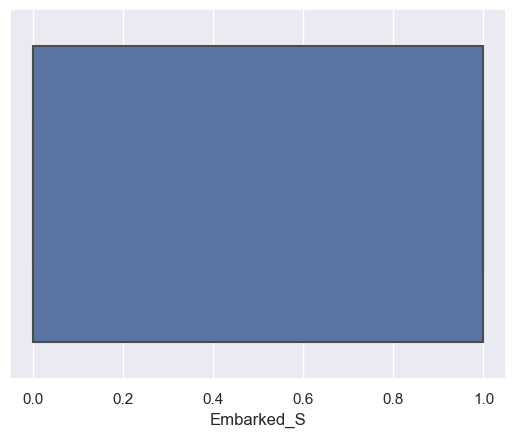

In [34]:
# preprocessing part 3 - outlier treatement 
# please note, outlier treatement is not required in this case
def boxplots(col):
    sns.boxplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [35]:
# preprocessing part 4 - not required 
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,train,0,1,0,1
1,1.0,0,38.0,1,0,train,0,0,0,0
2,1.0,0,26.0,0,0,train,0,1,0,1
3,1.0,0,35.0,1,0,train,0,0,0,1
4,0.0,1,35.0,0,0,train,0,1,0,1


AxesSubplot(0.125,0.11;0.775x0.77)


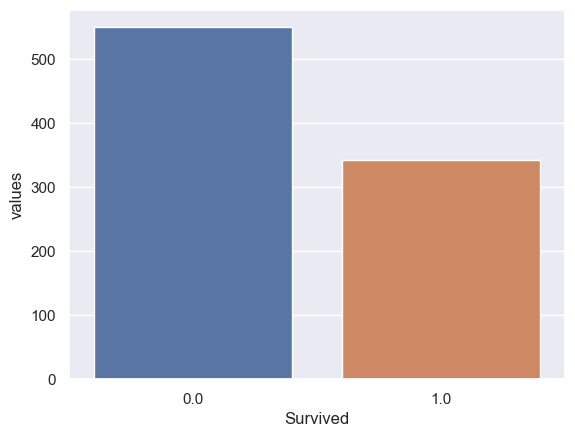

In [36]:
# preprocessing part 5 - imbalance checks
temp = all_data['Survived'].value_counts()
temp_df = pd.DataFrame({'Survived': temp.index, 'values': temp.values})
print(sns.barplot(x='Survived', y = 'values', data=temp_df))
plt.show()

In [37]:
all_data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

# preprocessing part completed

# EDA - Exploratory data anaysis

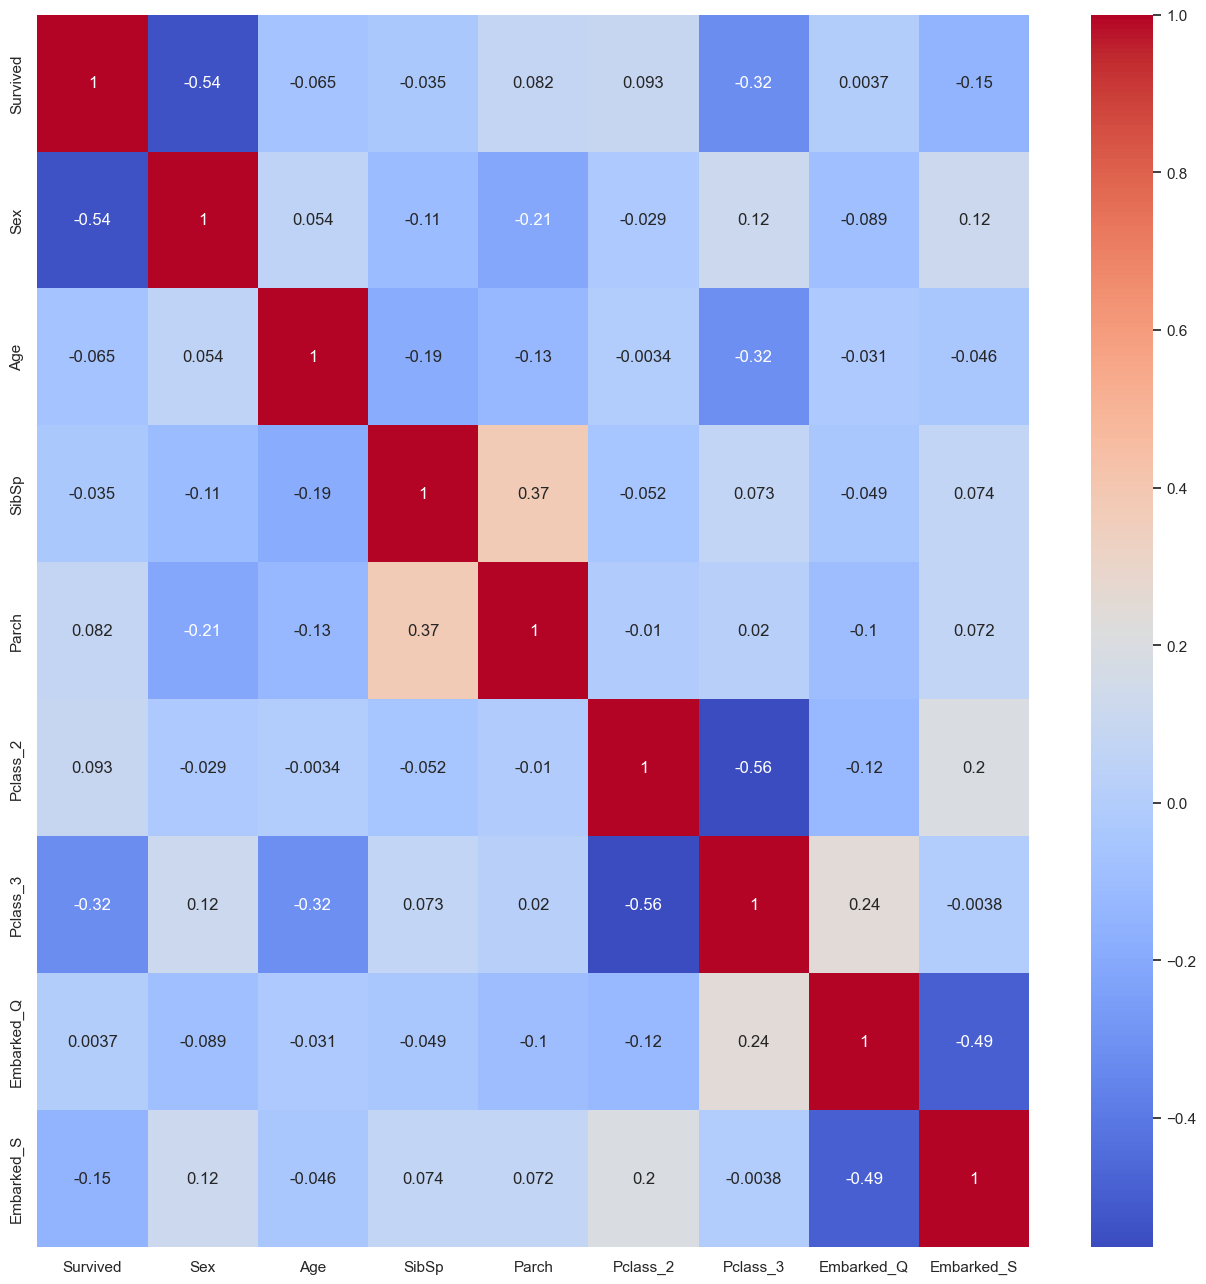

In [38]:
plt.figure(figsize=(16,16))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [39]:
# please use pandas profilling EDA part - already taught

# DTALE METHOD

In [40]:
#!pip install dtale

In [41]:
import dtale
import dtale.app as dtale_app

In [42]:
dtale.show(all_data)

# we have to segregate train and test seperatly for model building and prediction

In [44]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,train,0,1,0,1
1,1.0,0,38.0,1,0,train,0,0,0,0
2,1.0,0,26.0,0,0,train,0,1,0,1
3,1.0,0,35.0,1,0,train,0,0,0,1
4,0.0,1,35.0,0,0,train,0,1,0,1


In [45]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [47]:
print(all_data.shape)
print()
print(train.shape)
print()
print(test.shape)

(1309, 10)

(891, 10)

(418, 10)


In [48]:
train.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,train,0,1,0,1
1,1.0,0,38.0,1,0,train,0,0,0,0
2,1.0,0,26.0,0,0,train,0,1,0,1
3,1.0,0,35.0,1,0,train,0,0,0,1
4,0.0,1,35.0,0,0,train,0,1,0,1


In [50]:
train.isnull().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
data          0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

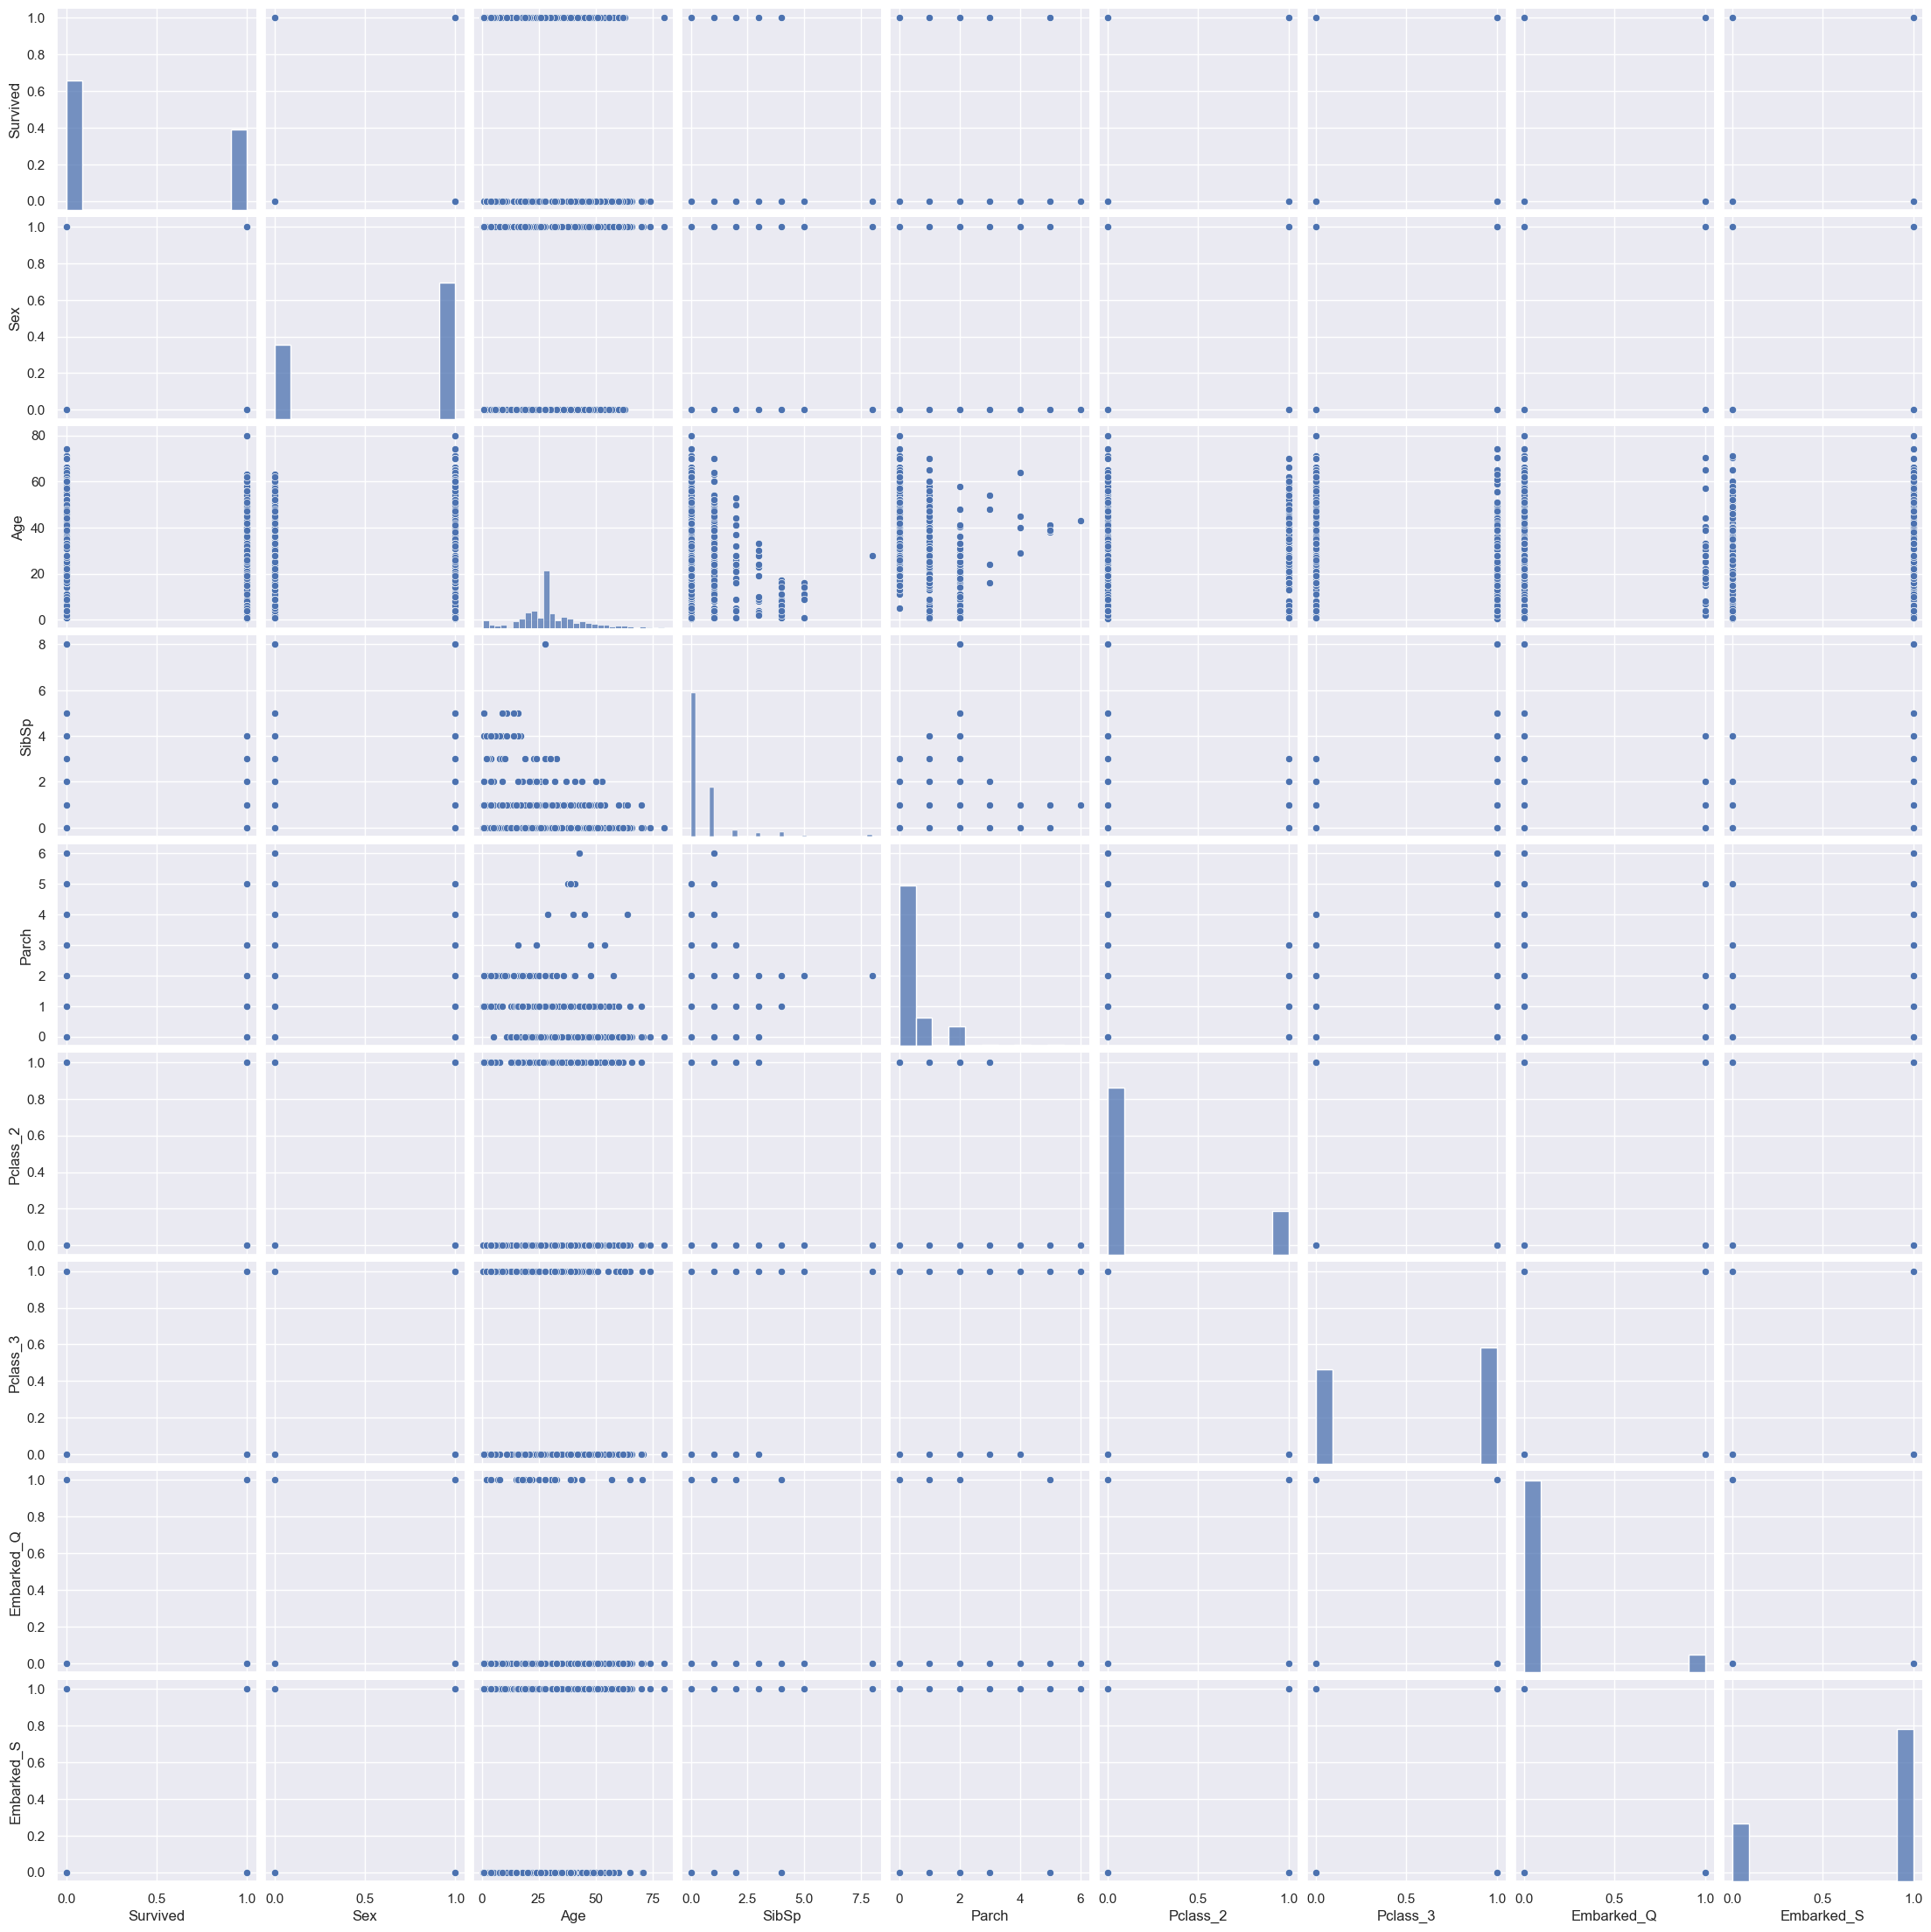

In [115]:
sns.pairplot(train)

In [55]:
# split the data into ind and dep variable
x = train.drop(['Survived','data'], axis=1)
y = train[['Survived']]

In [56]:
x.head()

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0
2,0,26.0,0,0,0,1,0,1
3,0,35.0,1,0,0,0,0,1
4,1,35.0,0,0,0,1,0,1


In [57]:
y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [49]:
test.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,NaN,1,34.5,0,0,test,0,1,1,0
1,NaN,0,47.0,1,0,test,0,1,0,1
2,NaN,1,62.0,0,0,test,1,0,1,0
3,NaN,1,27.0,0,0,test,0,1,0,1
4,NaN,0,22.0,1,1,test,0,1,0,1


In [51]:
test.isnull().sum()

Survived      418
Sex             0
Age             0
SibSp           0
Parch           0
data            0
Pclass_2        0
Pclass_3        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [58]:
test = test.drop(['Survived', 'data'], axis=1)

In [59]:
# Test data is for prediction and the ask is same in the case study
test.head()

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,34.5,0,0,0,1,1,0
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [63]:
y.value_counts()

Survived
0.0         549
1.0         342
dtype: int64

In [65]:
# We have to build model and prediction with x and y dataset 
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=1,
                                                    stratify=y)

# Building Logistic Regression with Binary Class

In [68]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [69]:
# Predict
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [71]:
y_pred_test

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1.])

In [72]:
y_test

,Survived
391,1.0
584,0.0
610,0.0
261,1.0
496,1.0
...,...
434,0.0
331,0.0
559,1.0
376,1.0


In [73]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
print(confusion_matrix(y_train, y_pred_train))
print("*********"*5)
print(confusion_matrix(y_test, y_pred_test))

[[362  50]
 [ 75 181]]
*********************************************
[[119  18]
 [ 27  59]]


In [75]:
print(classification_report(y_train, y_pred_train))
print("*********"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       412
         1.0       0.78      0.71      0.74       256

    accuracy                           0.81       668
   macro avg       0.81      0.79      0.80       668
weighted avg       0.81      0.81      0.81       668

*********************************************
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       137
         1.0       0.77      0.69      0.72        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [76]:
print(accuracy_score(y_train, y_pred_train))
print("*********"*5)
print(accuracy_score(y_test, y_pred_test))

0.812874251497006
*********************************************
0.7982062780269058


# Cross validation 

In [80]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_model, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_model, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

Train Accuracy [0.8358209  0.74626866 0.7761194  0.7761194  0.82089552 0.8358209
 0.85074627 0.7761194  0.83333333 0.8030303 ]

Train Mean Accuracy 0.8054274084124831

Train Max Accuracy 0.8507462686567164

Test Accuracy [0.73913043 0.86956522 0.56521739 0.77272727 0.95454545 0.68181818
 0.95454545 0.81818182 0.86363636 0.86363636]

Test Mean Accuracy 0.808300395256917

Test Max Accuracy 0.9545454545454546


# ROC and AUC

In [82]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7773298251570191

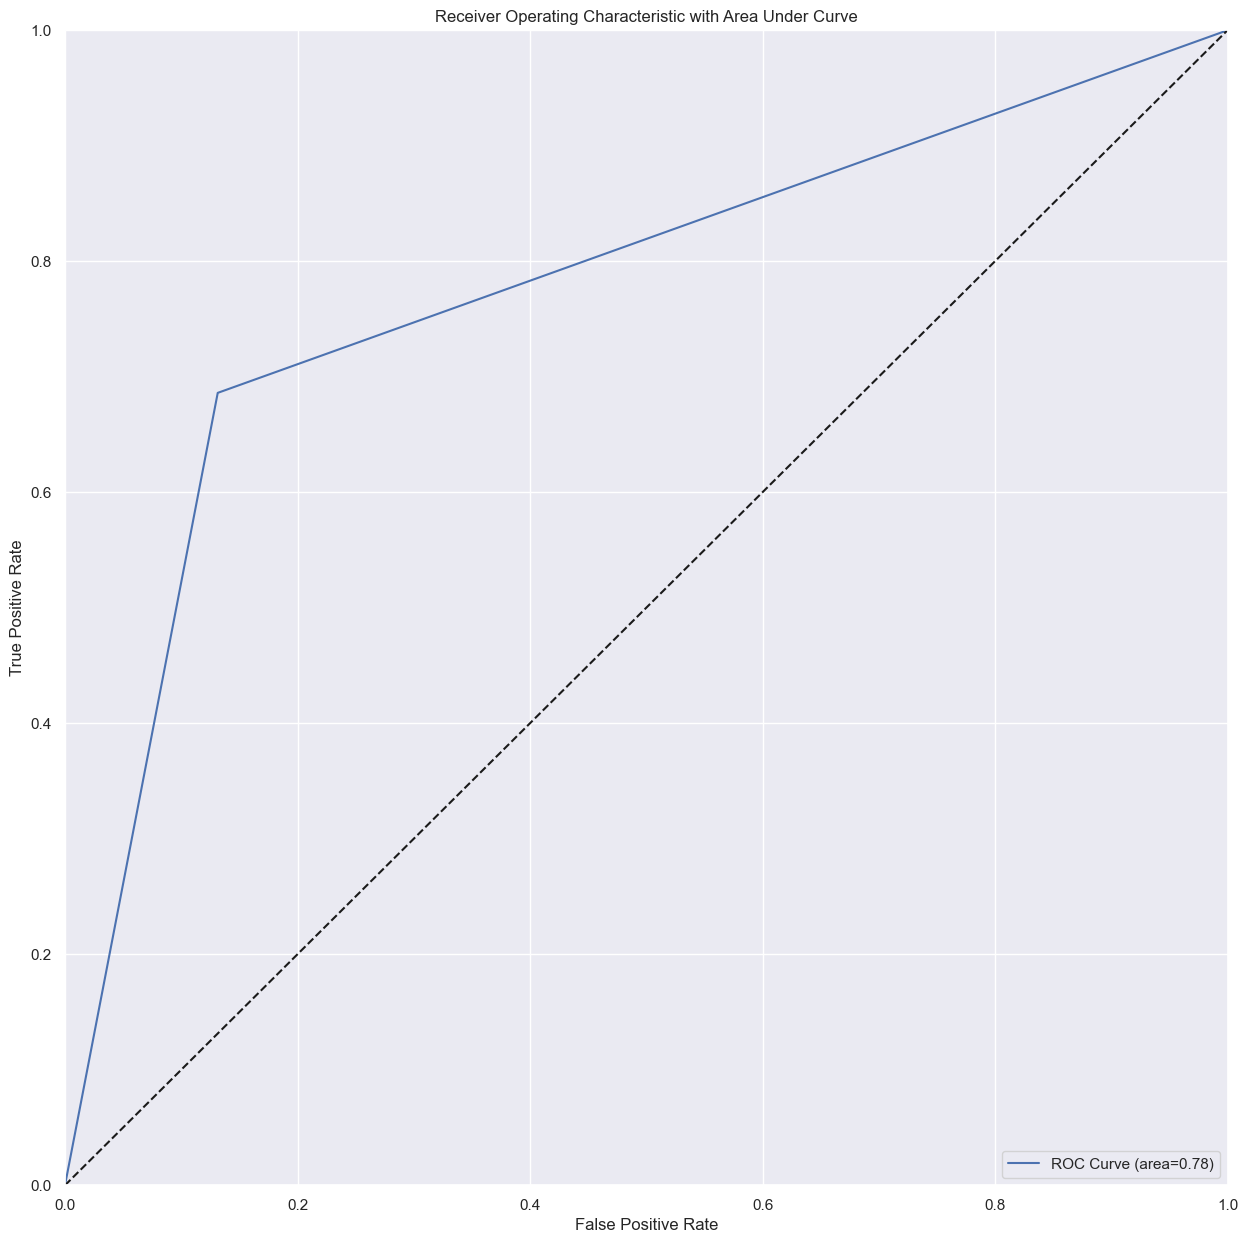

In [84]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

# Final Part - predict the result for test dataset where we don't have survived column


In [85]:
test.head()

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,34.5,0,0,0,1,1,0
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [87]:
final_result = logit_model.predict(test)

In [88]:
final_result

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [91]:
final_result_1 = pd.concat([test, pd.DataFrame(final_result)], axis=1)

In [92]:
final_result_1

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,0
0,1,34.5,0,0,0,1,1,0,0.0
1,0,47.0,1,0,0,1,0,1,0.0
2,1,62.0,0,0,1,0,1,0,0.0
3,1,27.0,0,0,0,1,0,1,0.0
4,0,22.0,1,1,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...
413,1,28.0,0,0,0,1,0,1,0.0
414,0,39.0,0,0,0,0,0,0,1.0
415,1,38.5,0,0,0,1,0,1,0.0
416,1,28.0,0,0,0,1,0,1,0.0


In [93]:
final_result_1 = final_result_1.rename(columns = {0 : "Survived"})

In [94]:
final_result_1

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
0,1,34.5,0,0,0,1,1,0,0.0
1,0,47.0,1,0,0,1,0,1,0.0
2,1,62.0,0,0,1,0,1,0,0.0
3,1,27.0,0,0,0,1,0,1,0.0
4,0,22.0,1,1,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...
413,1,28.0,0,0,0,1,0,1,0.0
414,0,39.0,0,0,0,0,0,0,1.0
415,1,38.5,0,0,0,1,0,1,0.0
416,1,28.0,0,0,0,1,0,1,0.0


In [99]:
final_result_2 = final_result_1[['Survived']]

In [100]:
final_result_2.head()

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [95]:
titanic_test1 = pd.read_csv('Titanic_test.csv')

In [98]:
titanic_test1.shape

(418, 11)

In [101]:
titanic_test_submission = pd.concat([titanic_test1, final_result_2], axis=1)

In [102]:
titanic_test_submission

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.0


In [103]:
titanic_test_submission.to_csv("final_titanic_test_output.csv")

# ***************** The END *****************

In [104]:
# Just for your awarness - Sigmoid formula : 1/(1+e^-z)

import numpy as np

In [105]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [106]:
sigmoid(1)

0.7310585786300049

In [107]:
sigmoid(100)

1.0

In [108]:
sigmoid(-10)

4.5397868702434395e-05

In [110]:
# lets plot the sigmoid curve
xvalue = np.linspace(-100,100,1000)
xvalue

array([-100.        ,  -99.7997998 ,  -99.5995996 ,  -99.3993994 ,
        -99.1991992 ,  -98.998999  ,  -98.7987988 ,  -98.5985986 ,
        -98.3983984 ,  -98.1981982 ,  -97.997998  ,  -97.7977978 ,
        -97.5975976 ,  -97.3973974 ,  -97.1971972 ,  -96.996997  ,
        -96.7967968 ,  -96.5965966 ,  -96.3963964 ,  -96.1961962 ,
        -95.995996  ,  -95.7957958 ,  -95.5955956 ,  -95.3953954 ,
        -95.1951952 ,  -94.99499499,  -94.79479479,  -94.59459459,
        -94.39439439,  -94.19419419,  -93.99399399,  -93.79379379,
        -93.59359359,  -93.39339339,  -93.19319319,  -92.99299299,
        -92.79279279,  -92.59259259,  -92.39239239,  -92.19219219,
        -91.99199199,  -91.79179179,  -91.59159159,  -91.39139139,
        -91.19119119,  -90.99099099,  -90.79079079,  -90.59059059,
        -90.39039039,  -90.19019019,  -89.98998999,  -89.78978979,
        -89.58958959,  -89.38938939,  -89.18918919,  -88.98898899,
        -88.78878879,  -88.58858859,  -88.38838839,  -88.18818

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

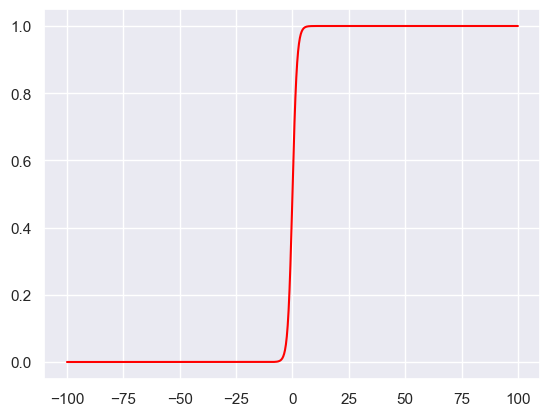

In [112]:
plt.plot(xvalue, sigmoid(xvalue), color='red')
plt.show()

# MultiClass Classification Problem

# IRIS dataset

In [116]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [119]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [121]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [122]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [123]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [124]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [125]:
df = df[['sepal_length','petal_length', 'species']]

In [126]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [127]:
# split the data into x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [128]:
x.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [129]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [130]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Building Logistic Regression with Multiclass classification 
## OVR or OVA

In [132]:
# multi_class : {'auto', 'ovr', 'multinomial'}
logit_ovr = LogisticRegression(multi_class='ovr')
logit_ovr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [133]:
# predict
y_pred_ovr_train = logit_ovr.predict(x_train)
y_pred_ovr_test = logit_ovr.predict(x_test)

In [134]:
# evaluate the model
print(confusion_matrix(y_train, y_pred_ovr_train))
print()
print(confusion_matrix(y_test, y_pred_ovr_test))

[[39  0  0]
 [ 0 29  8]
 [ 0  1 43]]

[[11  0  0]
 [ 1  9  3]
 [ 0  0  6]]


In [135]:
print(classification_report(y_train, y_pred_ovr_train))
print()
print(classification_report(y_test, y_pred_ovr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.78      0.87        37
           2       0.84      0.98      0.91        44

    accuracy                           0.93       120
   macro avg       0.94      0.92      0.92       120
weighted avg       0.93      0.93      0.92       120


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.69      0.82        13
           2       0.67      1.00      0.80         6

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30



In [136]:
print(accuracy_score(y_train, y_pred_ovr_train))
print()
print(accuracy_score(y_test, y_pred_ovr_test))

0.925

0.8666666666666667


In [137]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_ovr, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_ovr, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

Train Accuracy [0.91666667 1.         1.         0.91666667 1.         0.75
 1.         0.83333333 0.83333333 0.91666667]

Train Mean Accuracy 0.9166666666666666

Train Max Accuracy 1.0

Test Accuracy [1.         1.         1.         1.         1.         0.66666667
 1.         1.         1.         0.66666667]

Test Mean Accuracy 0.9333333333333332

Test Max Accuracy 1.0


# Approach 2 - 'multinomial'

In [138]:
# multi_class : {'auto', 'ovr', 'multinomial'}
logit_multi = LogisticRegression(multi_class='multinomial')
logit_multi.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [139]:
# predict
y_pred_multi_train = logit_multi.predict(x_train)
y_pred_multi_test = logit_multi.predict(x_test)

In [140]:
# evaluate the model
print(confusion_matrix(y_train, y_pred_multi_train))
print()
print(confusion_matrix(y_test, y_pred_multi_test))

[[39  0  0]
 [ 0 34  3]
 [ 0  2 42]]

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [141]:
# evaluate the model
print(classification_report(y_train, y_pred_multi_train))
print()
print(classification_report(y_test, y_pred_multi_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.94      0.92      0.93        37
           2       0.93      0.95      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [142]:
# evaluate the model
print(accuracy_score(y_train, y_pred_multi_train))
print()
print(accuracy_score(y_test, y_pred_multi_test))

0.9583333333333334

0.9666666666666667


# Challenges - 10 class classification problem - MNIST dataset
# Task 1 - https://www.kaggle.com/competitions/digit-recognizer/data  : multiclasss classification problem


# Task 2 - https://www.kaggle.com/competitions/spaceship-titanic  : binary classs classification problem

# Linear Regression - https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

# Please refer this link for real time project - https://archive.ics.uci.edu/datasets

# How to check data is significant or not

In [145]:
dataset = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Stats and ML - Weekend Batch\\Linear Regression\\50_Startups.csv")

In [146]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [148]:
dataset['State'] = dataset['State'].astype('category')
dataset['State'] = dataset['State'].cat.codes

In [149]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [150]:
# anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [151]:
model = ols('Profit ~ State', data=dataset).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq    df         F    PR(>F)
State     8.249041e+08   1.0  0.502608  0.481786
Residual  7.877992e+10  48.0       NaN       NaN


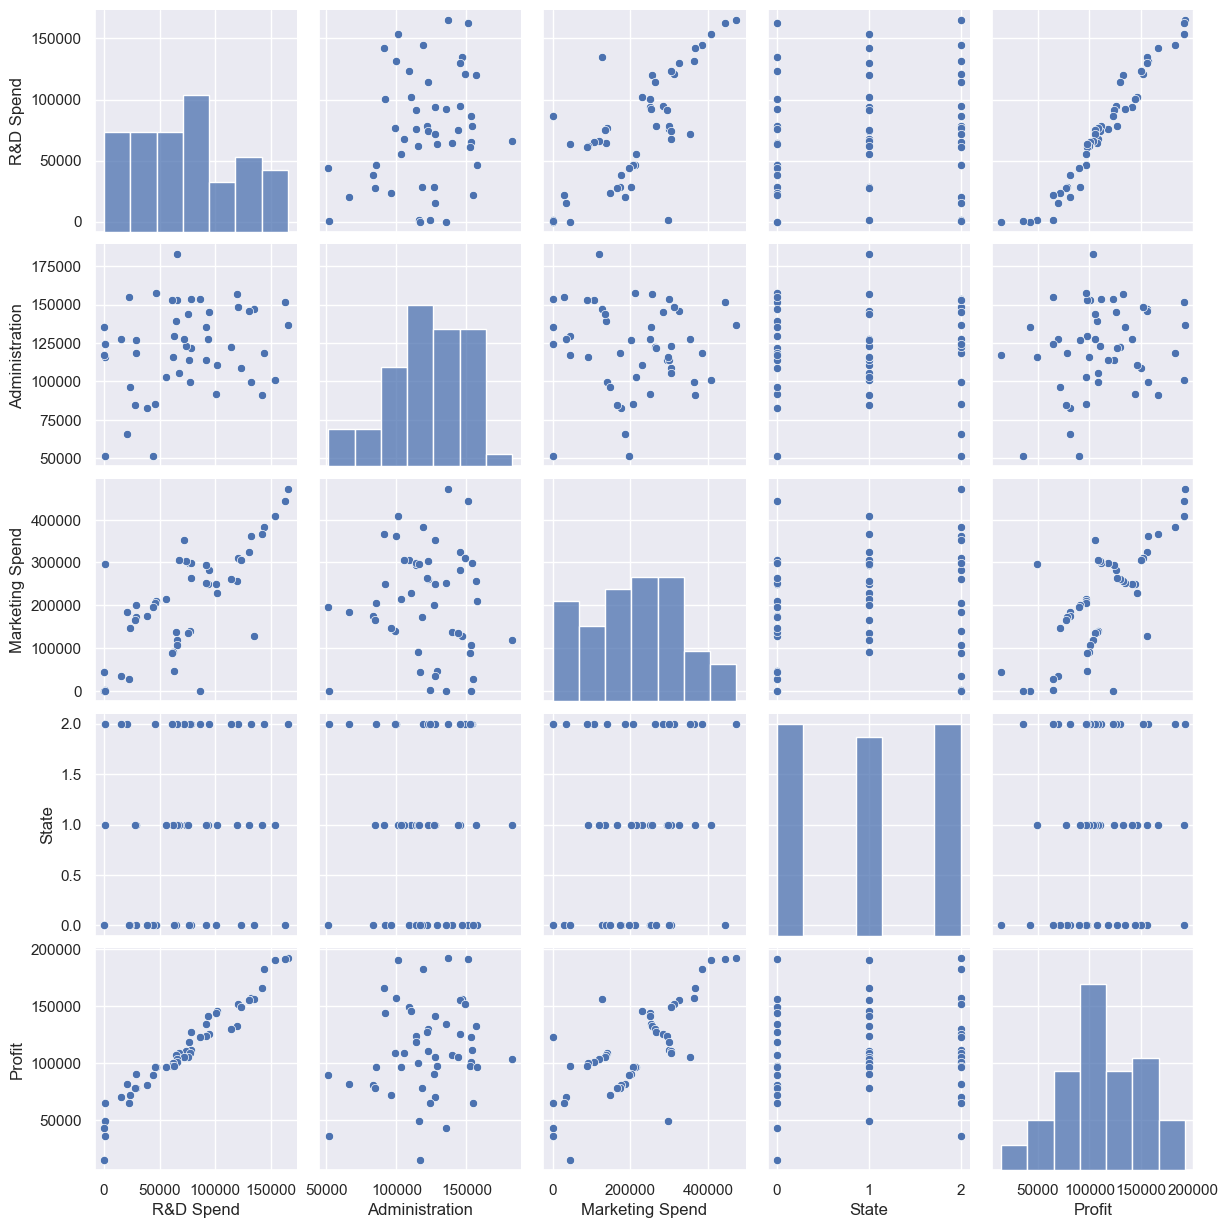

In [152]:
sns.pairplot(dataset)

In [155]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
dataset = scale.fit_transform(dataset)


<AxesSubplot:>

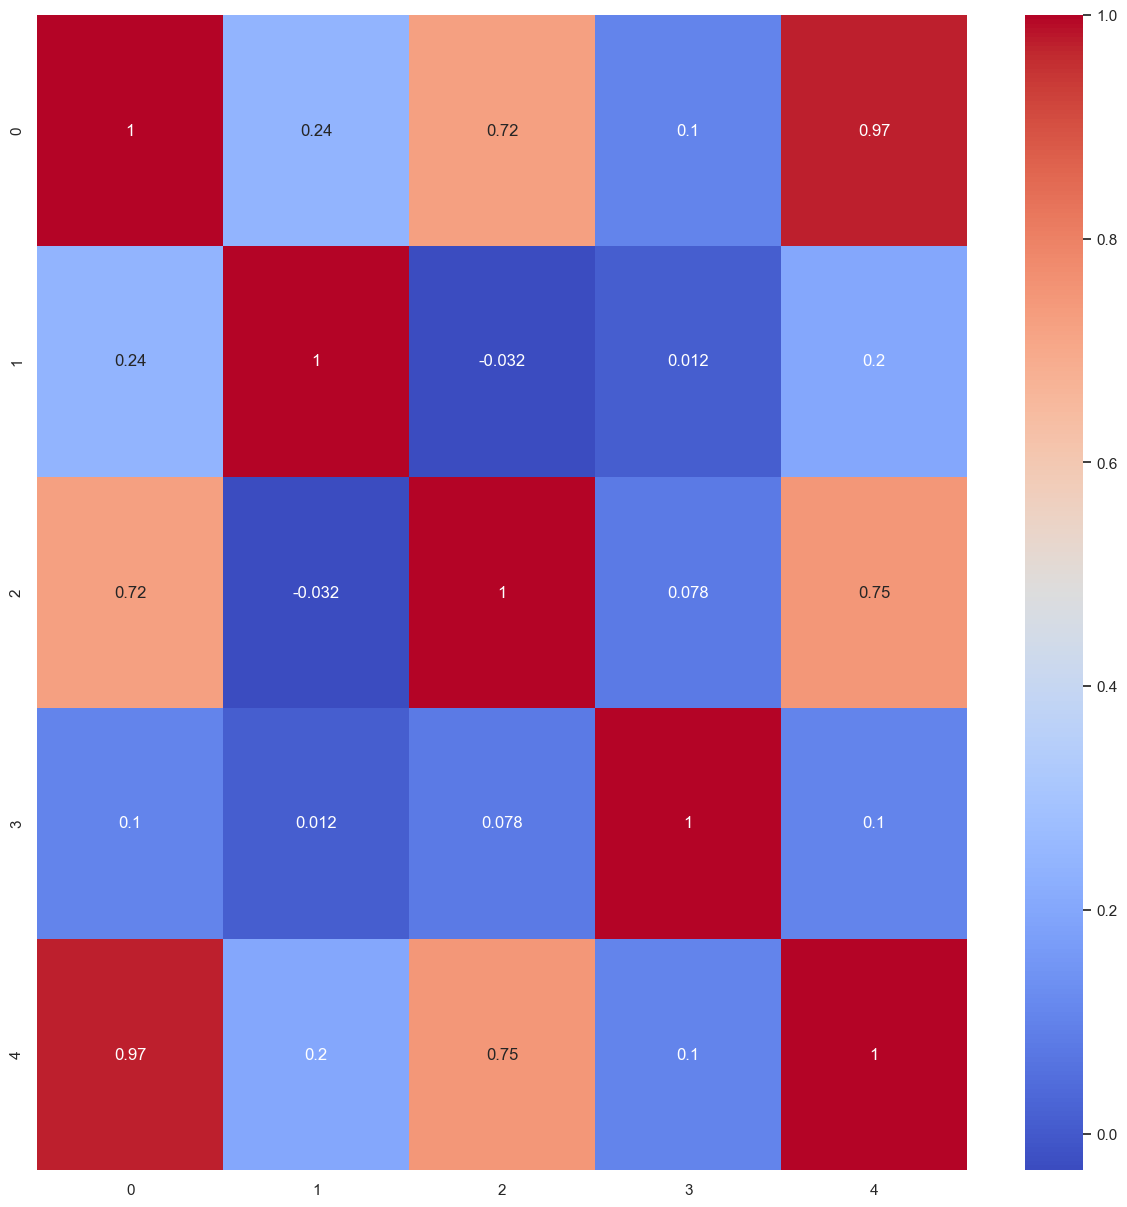

In [157]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(dataset).corr(), annot=True, cmap='coolwarm')